# Rodriguez, I. MIS 665, 16 SEP 2019
K-State Honor Code: "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

In [283]:
# load key data analysis packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import scikitplot as skplt

# Visualization Tools

# load plotly visualization functionality
import plotly.graph_objects as go
import plotly.express as px

# load seaborn visualization functionality
import seaborn as sns

# load scatter_matrix functionality
from pandas.plotting import scatter_matrix
# load scatter_matrix functionality

# load plotly visualization functionality
import plotly.graph_objects as go
import plotly.express as px

# load seaborn visualization functionality
import seaborn as sns
%matplotlib inline


# Statistics Tools

# load  pingouin statistics functionality
import pingouin as pg

# f regression
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

#stats model
import statsmodels.api as sm
from statsmodels.formula.api import ols

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG

#from graphviz import Source
from IPython.display import display

#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#for validating your classification model
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

#linear model
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score


import warnings
warnings.filterwarnings("ignore")

## Data Cleaning and Preparation:  

- Data Quality: 
    - The Data received extension preparation of the initial portion of this project

- Data Transformations:
    - Dropped extraneous columns
    - Created new imdb score quadriles
    - Filtered for modern content ratings
    - Created dummy variables for content ratings, foreign language, and foreign production
    

In [284]:
#m3 = pd.read_csv("data/movies3.csv")
m3 = pd.read_csv("https://raw.githubusercontent.com/irrodrig/finalProject/master/data/movies3.csv")

In [285]:
m3.head(1)

,year_index,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,movie_title,num_voted_users,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,foreign_film,origin,origin_language
0,2009-01-01,723.0,178.0,0.0,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,...,PG-13,237000000.0,2009.0,936.0,7.9,33000,523505847.0,USA,American,English


In [286]:
m3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4614 entries, 0 to 4613
Data columns (total 25 columns):
year_index                   4614 non-null object
num_critic_for_reviews       4614 non-null float64
duration                     4614 non-null float64
director_facebook_likes      4614 non-null float64
actor_3_facebook_likes       4614 non-null float64
actor_1_facebook_likes       4614 non-null float64
gross                        4614 non-null float64
genres                       4614 non-null object
movie_title                  4614 non-null object
num_voted_users              4614 non-null int64
cast_total_facebook_likes    4614 non-null int64
movie_imdb_link              4614 non-null object
num_user_for_reviews         4614 non-null float64
language                     4614 non-null object
country                      4614 non-null object
content_rating               4614 non-null object
budget                       4614 non-null float64
title_year                   4614 non

In [287]:
# drop extraneous columns
m3 = m3.drop(['movie_imdb_link','title_year'], axis=1)

# simplify column names
# m2.rename(columns={'num_user_for_reviews': 'reviewers', 'content_rating': 'rating','year_index': 'yearindex','director_name': 'director', 'num_critic_for_reviews': 'critical', 'movie_title': 'title','num_voted_users': 'votedusers', 'cast_total_facebook_likes': 'castfacebook','imdb_score': 'score', 'origin_language': 'originlanguage','foreign_film': 'foreign','movie_facebook_likes': 'facebook','num_user_for_reviews': 'reviewers', 'content_rating': 'rating'}, inplace=True)


m3.head(2)

,year_index,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,movie_title,num_voted_users,...,country,content_rating,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,foreign_film,origin,origin_language
0,2009-01-01,723.0,178.0,0.0,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,...,USA,PG-13,237000000.0,936.0,7.9,33000,523505847.0,USA,American,English
1,2007-01-01,302.0,169.0,563.0,1000.0,40000.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,471220,...,USA,PG-13,300000000.0,5000.0,7.1,0,9404152.0,USA,American,English


In [288]:
m3['score_quads'] = pd.qcut(m3['imdb_score'], 4, labels=['1', '2', '3', '4'])


In [289]:
### Categorical Transformations:  rating, origin, language

In [290]:
m3.columns

Index(['year_index', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'genres', 'movie_title',
       'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews',
       'language', 'country', 'content_rating', 'budget',
       'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes',
       'profit', 'foreign_film', 'origin', 'origin_language', 'score_quads'],
      dtype='object')

In [291]:
m3.groupby('origin').count()

,year_index,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,movie_title,num_voted_users,...,country,content_rating,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,foreign_film,origin_language,score_quads
origin,,,,,,,,,,,,,,,,,,,,,
American,3560,3560,3560,3560,3560,3560,3560,3560,3560,3560,...,3560,3560,3560,3560,3560,3560,3560,3560,3560,3560
Foreign,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,...,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054


In [292]:
m3.groupby('origin_language').count()

,year_index,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,movie_title,num_voted_users,...,country,content_rating,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,foreign_film,origin,score_quads
origin_language,,,,,,,,,,,,,,,,,,,,,
English,4388,4388,4388,4388,4388,4388,4388,4388,4388,4388,...,4388,4388,4388,4388,4388,4388,4388,4388,4388,4388
Foreign,226,226,226,226,226,226,226,226,226,226,...,226,226,226,226,226,226,226,226,226,226


In [293]:
# Tranform ratings into categorical values

In [294]:
m3.groupby('content_rating').size().sort_values(ascending=False)



content_rating
R            2089
PG-13        1441
PG            694
Not Rated     113
G             112
Unrated        60
Approved       55
X              13
Passed          9
NC-17           7
GP              6
M               5
TV-G            4
TV-PG           3
TV-14           3
dtype: int64

In [295]:
m3[(m3['content_rating'] == 'Not Rated')].sort_values('year_index').head()

# Approved movies timeframe 1933-1967
# Passed movies timeframe 1921-1951
# GP timeframe 1969 to 1972
# M timeframe 1967-1969
# TV-G 1965-2012(Notably High School Musical 1 and 2)
# TV-PG 2010-2011
# TV-14 2010-2015(Notably Sharknado)

# Drop all records TV-G,PG,14 and Passed, Approved, GP, and M
# Combine Unrated and Not Rated






,year_index,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,movie_title,num_voted_users,...,content_rating,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,foreign_film,origin,origin_language,score_quads
2624,1927-01-01,260.0,145.0,756.0,18.0,136.0,26435.0,Drama|Sci-Fi,Metropolis,111841,...,Not Rated,6000000.0,23.0,8.3,12000,-5973565.0,Germany,Foreign,Foreign,4
4342,1929-01-01,71.0,110.0,21.0,3.0,426.0,9950.0,Crime|Drama|Romance,Pandora's Box,7431,...,Not Rated,39752620.0,20.0,8.0,926,-39742670.0,Germany,Foreign,Foreign,4
4133,1939-01-01,96.0,120.0,964.0,248.0,607.0,48468407.0,Comedy|Drama,Mr. Smith Goes to Washington,77392,...,Not Rated,1500000.0,319.0,8.2,0,46968407.0,USA,American,English,4
4190,1940-01-01,144.0,130.0,13000.0,333.0,1000.0,48468407.0,Drama|Film-Noir|Mystery|Thriller,Rebecca,87424,...,Not Rated,1288000.0,991.0,8.2,0,47180407.0,USA,American,English,4
4192,1945-01-01,97.0,101.0,0.0,66.0,287.0,48468407.0,Drama|Film-Noir,The Lost Weekend,24959,...,Not Rated,1250000.0,160.0,8.0,0,47218407.0,USA,American,English,4


In [296]:
m3 = m3[(m3['content_rating'] != 'Approved' )]

In [297]:
m3 = m3[(m3['content_rating'] != 'Passed' )]
m3 = m3[(m3['content_rating'] != 'TV-G' )]
m3 = m3[(m3['content_rating'] != 'TV-PG' )]
m3 = m3[(m3['content_rating'] != 'TV-14')]
m3 = m3[(m3['content_rating'] != 'M')]
m3 = m3[(m3['content_rating'] != 'GP')]

In [298]:
m3.groupby('content_rating').size().sort_values(ascending=False)


content_rating
R            2089
PG-13        1441
PG            694
Not Rated     113
G             112
Unrated        60
X              13
NC-17           7
dtype: int64

In [299]:
# Set dataframe for regression analysis
m3Regression = m3
m3Regression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4529 entries, 0 to 4613
Data columns (total 24 columns):
year_index                   4529 non-null object
num_critic_for_reviews       4529 non-null float64
duration                     4529 non-null float64
director_facebook_likes      4529 non-null float64
actor_3_facebook_likes       4529 non-null float64
actor_1_facebook_likes       4529 non-null float64
gross                        4529 non-null float64
genres                       4529 non-null object
movie_title                  4529 non-null object
num_voted_users              4529 non-null int64
cast_total_facebook_likes    4529 non-null int64
num_user_for_reviews         4529 non-null float64
language                     4529 non-null object
country                      4529 non-null object
content_rating               4529 non-null object
budget                       4529 non-null float64
actor_2_facebook_likes       4529 non-null float64
imdb_score                   4529 no

In [300]:
# Set dataframe from classification analysis by creating dummy variables for rating, origin, and originlanguage values

m3 =  pd.get_dummies(m3, columns=["content_rating", "origin", "origin_language"],
                         prefix=["rating", "origin", "originlang"], drop_first=True)

# Correlation Analysis

- Two Dataframes developed: 
    - m3:  Comprehensive dataframe with dummy variables and categorical IMDB scores
    - m3Regression:  Dataframe without dummy variables and continous IMDB scores


In [301]:
m3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4529 entries, 0 to 4613
Data columns (total 30 columns):
year_index                   4529 non-null object
num_critic_for_reviews       4529 non-null float64
duration                     4529 non-null float64
director_facebook_likes      4529 non-null float64
actor_3_facebook_likes       4529 non-null float64
actor_1_facebook_likes       4529 non-null float64
gross                        4529 non-null float64
genres                       4529 non-null object
movie_title                  4529 non-null object
num_voted_users              4529 non-null int64
cast_total_facebook_likes    4529 non-null int64
num_user_for_reviews         4529 non-null float64
language                     4529 non-null object
country                      4529 non-null object
budget                       4529 non-null float64
actor_2_facebook_likes       4529 non-null float64
imdb_score                   4529 non-null float64
movie_facebook_likes         4529 n

In [302]:
m3.corr()


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,...,profit,rating_NC-17,rating_Not Rated,rating_PG,rating_PG-13,rating_R,rating_Unrated,rating_X,origin_Foreign,originlang_Foreign
num_critic_for_reviews,1.000000,0.259948,0.179328,0.257717,0.189729,0.450114,0.613245,0.258498,0.592001,0.466323,...,0.200700,0.011068,-0.074137,-0.104880,0.133436,0.007639,-0.069360,-0.000691,-0.023177,-0.041052
duration,0.259948,1.000000,0.184439,0.132207,0.099726,0.249015,0.356991,0.136205,0.368067,0.293857,...,0.082272,-0.011780,-0.004879,-0.070421,0.087540,0.004263,-0.029558,-0.039140,0.032983,0.041306
director_facebook_likes,0.179328,0.184439,1.000000,0.122494,0.096364,0.140925,0.301537,0.125216,0.222726,0.098207,...,0.101153,-0.007508,-0.024884,0.008985,0.010050,0.006833,-0.014881,-0.011418,-0.081653,-0.030921
actor_3_facebook_likes,0.257717,0.132207,0.122494,1.000000,0.257009,0.286448,0.271807,0.484514,0.217470,0.268083,...,0.150716,-0.009029,-0.046372,0.004196,0.103417,-0.065636,-0.037377,-0.013660,-0.088107,-0.078177
actor_1_facebook_likes,0.189729,0.099726,0.096364,0.257009,1.000000,0.145959,0.194363,0.948373,0.143428,0.172231,...,0.048232,-0.006814,-0.061404,-0.017125,0.069776,-0.008649,-0.049947,-0.001600,-0.080113,-0.091933
gross,0.450114,0.249015,0.140925,0.286448,0.145959,1.000000,0.619943,0.230738,0.545482,0.621534,...,0.778176,-0.023467,-0.058826,0.138089,0.164248,-0.241879,-0.046315,-0.019700,-0.160709,-0.126379
num_voted_users,0.613245,0.356991,0.301537,0.271807,0.194363,0.619943,1.000000,0.262398,0.793387,0.406237,...,0.465651,-0.009240,-0.072004,-0.047804,0.089166,-0.010743,-0.056840,-0.012906,-0.083839,-0.067863
cast_total_facebook_likes,0.258498,0.136205,0.125216,0.484514,0.948373,0.230738,0.262398,1.000000,0.200969,0.248422,...,0.095367,-0.010681,-0.072830,-0.015680,0.092553,-0.022494,-0.058790,-0.007869,-0.106796,-0.112171
num_user_for_reviews,0.592001,0.368067,0.222726,0.217470,0.143428,0.545482,0.793387,0.200969,1.000000,0.424684,...,0.355816,0.000618,-0.076188,-0.078483,0.119205,-0.007385,-0.051061,0.003333,-0.056018,-0.068901
budget,0.466323,0.293857,0.098207,0.268083,0.172231,0.621534,0.406237,0.248422,0.424684,1.000000,...,-0.008341,-0.026873,-0.090576,0.116131,0.239613,-0.268580,-0.067214,-0.042747,-0.092980,-0.073659


In [303]:
m3.corr()['imdb_score'].sort_values(ascending=False)

imdb_score                   1.000000
num_voted_users              0.449661
duration                     0.367885
num_critic_for_reviews       0.355673
num_user_for_reviews         0.321989
movie_facebook_likes         0.273153
profit                       0.191202
gross                        0.185630
director_facebook_likes      0.183960
originlang_Foreign           0.155080
origin_Foreign               0.111176
cast_total_facebook_likes    0.107403
actor_2_facebook_likes       0.100175
actor_1_facebook_likes       0.095677
rating_R                     0.094539
actor_3_facebook_likes       0.064808
budget                       0.057063
rating_Unrated               0.050859
rating_Not Rated             0.026706
rating_NC-17                 0.004722
rating_X                     0.004356
rating_PG                   -0.044016
rating_PG-13                -0.095195
Name: imdb_score, dtype: float64

In [304]:
m3Regression.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit
num_critic_for_reviews,1.000000,0.259948,0.179328,0.257717,0.189729,0.450114,0.613245,0.258498,0.592001,0.466323,0.268501,0.355673,0.691031,0.200700
duration,0.259948,1.000000,0.184439,0.132207,0.099726,0.249015,0.356991,0.136205,0.368067,0.293857,0.140441,0.367885,0.226542,0.082272
director_facebook_likes,0.179328,0.184439,1.000000,0.122494,0.096364,0.140925,0.301537,0.125216,0.222726,0.098207,0.120220,0.183960,0.162087,0.101153
actor_3_facebook_likes,0.257717,0.132207,0.122494,1.000000,0.257009,0.286448,0.271807,0.484514,0.217470,0.268083,0.552700,0.064808,0.264962,0.150716
actor_1_facebook_likes,0.189729,0.099726,0.096364,0.257009,1.000000,0.145959,0.194363,0.948373,0.143428,0.172231,0.392087,0.095677,0.136675,0.048232
gross,0.450114,0.249015,0.140925,0.286448,0.145959,1.000000,0.619943,0.230738,0.545482,0.621534,0.249063,0.185630,0.363395,0.778176
num_voted_users,0.613245,0.356991,0.301537,0.271807,0.194363,0.619943,1.000000,0.262398,0.793387,0.406237,0.256569,0.449661,0.530471,0.465651
cast_total_facebook_likes,0.258498,0.136205,0.125216,0.484514,0.948373,0.230738,0.262398,1.000000,0.200969,0.248422,0.637072,0.107403,0.207344,0.095367
num_user_for_reviews,0.592001,0.368067,0.222726,0.217470,0.143428,0.545482,0.793387,0.200969,1.000000,0.424684,0.205657,0.321989,0.391085,0.355816
budget,0.466323,0.293857,0.098207,0.268083,0.172231,0.621534,0.406237,0.248422,0.424684,1.000000,0.256831,0.057063,0.316590,-0.008341


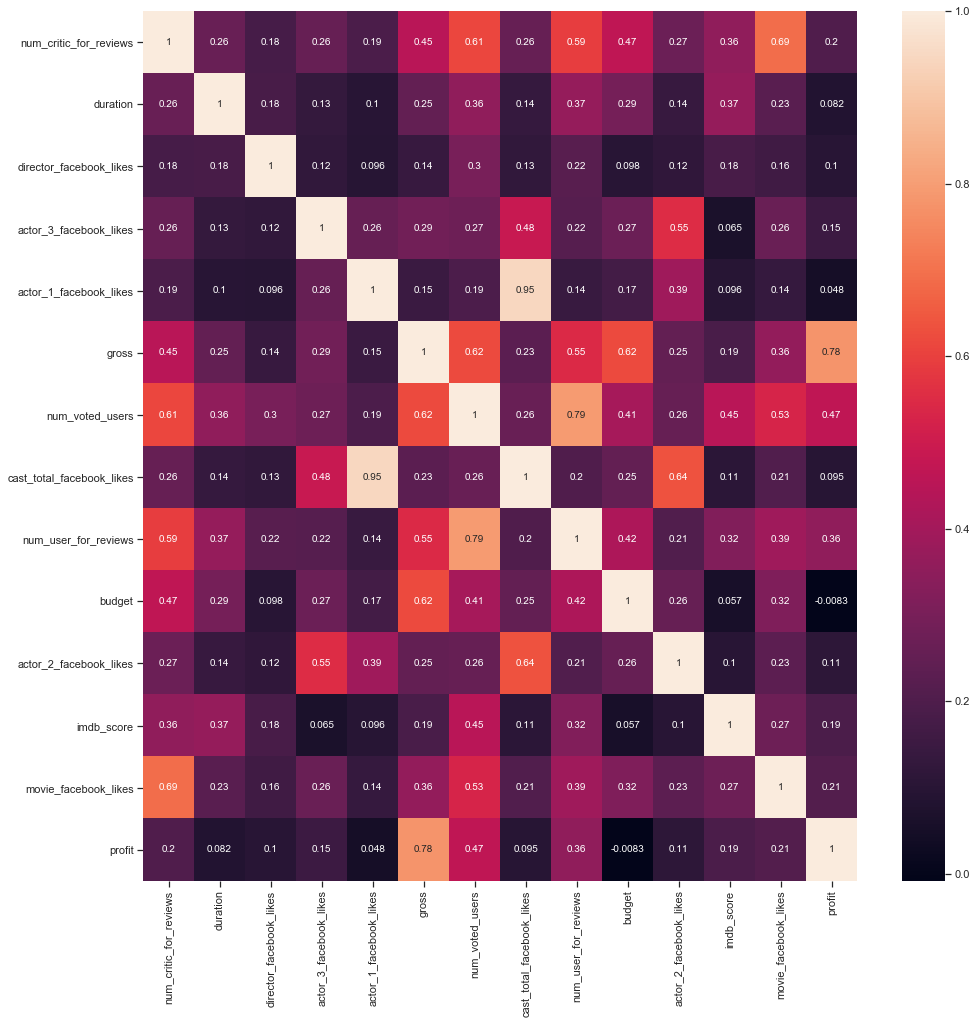

In [305]:
# Correlation Heatmap

plt.figure(figsize=(16,16))
sns.heatmap(m3Regression.corr(), annot=True)


In [306]:
m3Regression.corr()['imdb_score'].sort_values(ascending=False)


imdb_score                   1.000000
num_voted_users              0.449661
duration                     0.367885
num_critic_for_reviews       0.355673
num_user_for_reviews         0.321989
movie_facebook_likes         0.273153
profit                       0.191202
gross                        0.185630
director_facebook_likes      0.183960
cast_total_facebook_likes    0.107403
actor_2_facebook_likes       0.100175
actor_1_facebook_likes       0.095677
actor_3_facebook_likes       0.064808
budget                       0.057063
Name: imdb_score, dtype: float64

# Regression Models

- Five regression models built:
    - All models used the m3Regression dataframe
    - Overall models did not perform especially well
    - Rank order of Models by R-squared value:
        - Lasso Linear Regression R-squared 0.323
        - Extra Tree Classifier Feature Selection R-squared 0.315
        - Ordinary Least Squared with all variables R-squared 0.293
        - Feature Selection R-squared 0.274
        - Ordinary Least Squared with top four variables R-squared 0.272

In [307]:
m3Regression.corr()['imdb_score'].sort_values(ascending=False)

imdb_score                   1.000000
num_voted_users              0.449661
duration                     0.367885
num_critic_for_reviews       0.355673
num_user_for_reviews         0.321989
movie_facebook_likes         0.273153
profit                       0.191202
gross                        0.185630
director_facebook_likes      0.183960
cast_total_facebook_likes    0.107403
actor_2_facebook_likes       0.100175
actor_1_facebook_likes       0.095677
actor_3_facebook_likes       0.064808
budget                       0.057063
Name: imdb_score, dtype: float64

In [308]:
# Initial model with all variables

m3OLSRegressionModel= ols("imdb_score~num_voted_users+duration+num_critic_for_reviews+num_user_for_reviews+movie_facebook_likes+profit+director_facebook_likes+cast_total_facebook_likes+actor_2_facebook_likes+actor_1_facebook_likes+actor_3_facebook_likes",m3Regression)
m3OLSRegression = m3OLSRegressionModel.fit()
print(m3OLSRegression.summary())


                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     170.1
Date:                Fri, 06 Dec 2019   Prob (F-statistic):               0.00
Time:                        00:05:38   Log-Likelihood:                -6090.1
No. Observations:                4529   AIC:                         1.220e+04
Df Residuals:                    4517   BIC:                         1.228e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [309]:
#Refined model with four variables

m3OLSRegressionModel4= ols("imdb_score~num_voted_users+duration+num_critic_for_reviews+num_user_for_reviews",m3Regression)
m3OLSRegression4 = m3OLSRegressionModel4.fit()
print(m3OLSRegression4.summary())


                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     422.9
Date:                Fri, 06 Dec 2019   Prob (F-statistic):          5.65e-310
Time:                        00:05:38   Log-Likelihood:                -6155.7
No. Observations:                4529   AIC:                         1.232e+04
Df Residuals:                    4524   BIC:                         1.235e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

### Lasso Linear Model Regression

In [310]:
# Lasso Model Development

m3Regression.corr()['imdb_score'].sort_values(ascending=False)

imdb_score                   1.000000
num_voted_users              0.449661
duration                     0.367885
num_critic_for_reviews       0.355673
num_user_for_reviews         0.321989
movie_facebook_likes         0.273153
profit                       0.191202
gross                        0.185630
director_facebook_likes      0.183960
cast_total_facebook_likes    0.107403
actor_2_facebook_likes       0.100175
actor_1_facebook_likes       0.095677
actor_3_facebook_likes       0.064808
budget                       0.057063
Name: imdb_score, dtype: float64

In [311]:
m3Regression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4529 entries, 0 to 4613
Data columns (total 24 columns):
year_index                   4529 non-null object
num_critic_for_reviews       4529 non-null float64
duration                     4529 non-null float64
director_facebook_likes      4529 non-null float64
actor_3_facebook_likes       4529 non-null float64
actor_1_facebook_likes       4529 non-null float64
gross                        4529 non-null float64
genres                       4529 non-null object
movie_title                  4529 non-null object
num_voted_users              4529 non-null int64
cast_total_facebook_likes    4529 non-null int64
num_user_for_reviews         4529 non-null float64
language                     4529 non-null object
country                      4529 non-null object
content_rating               4529 non-null object
budget                       4529 non-null float64
actor_2_facebook_likes       4529 non-null float64
imdb_score                   4529 no

In [312]:
y = m3Regression['imdb_score'] 
X = m3Regression.drop(['content_rating','imdb_score','score_quads','year_index','genres','movie_title','language','country','foreign_film','origin', 'origin_language'], axis=1 )

In [313]:


imdb_lasso = lm.Lasso()         
imdb_lasso.fit(X, y)
imdb_lasso_y = imdb_lasso.predict(X)


In [314]:
print('Coefficients: ', imdb_lasso.coef_)
print("y-intercept ", imdb_lasso.intercept_)
coef = ["%.3f" % i for i in imdb_lasso.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))


Coefficients:  [ 2.13735194e-03  1.16908004e-02  1.01119686e-05  7.16504123e-05
  7.40555279e-05 -3.31266282e-09  3.65150604e-06 -7.30272065e-05
 -4.21937080e-04 -2.52178643e-09  7.65820399e-05 -2.83678969e-06
  2.90293473e-09]
y-intercept  4.895982325257115


[('num_critic_for_reviews', '0.002'),
 ('duration', '0.012'),
 ('director_facebook_likes', '0.000'),
 ('actor_3_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('num_user_for_reviews', '-0.000'),
 ('budget', '-0.000'),
 ('actor_2_facebook_likes', '0.000'),
 ('movie_facebook_likes', '-0.000'),
 ('profit', '0.000')]

In [315]:
print("mean square error: ", mean_squared_error(y, imdb_lasso_y))
print("variance or r-squared: ", explained_variance_score(y, imdb_lasso_y))


mean square error:  0.8254990202799927
variance or r-squared:  0.32287179428634316


### F selection

In [316]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

In [317]:
X_imdb5 = SelectKBest(f_regression, k=5).fit_transform(X, y)
X_imdb5

array([[7.23000e+02, 1.78000e+02, 8.86204e+05, 3.05400e+03, 3.30000e+04],
       [3.02000e+02, 1.69000e+02, 4.71220e+05, 1.23800e+03, 0.00000e+00],
       [6.02000e+02, 1.48000e+02, 2.75868e+05, 9.94000e+02, 8.50000e+04],
       ...,
       [1.40000e+01, 9.50000e+01, 1.33800e+03, 1.40000e+01, 4.13000e+02],
       [1.40000e+01, 1.00000e+02, 1.25500e+03, 9.00000e+00, 6.60000e+02],
       [4.30000e+01, 9.00000e+01, 4.28500e+03, 8.40000e+01, 4.56000e+02]])

In [318]:
selector = SelectKBest(f_regression, k=5).fit(X, y)
imdb_selected = selector.get_support(indices=True)
print(imdb_selected)

[ 0  1  6  8 11]


In [319]:
m3fselModel= ols("imdb_score~num_critic_for_reviews+duration+num_voted_users+num_user_for_reviews+movie_facebook_likes",m3Regression)
m3fsel = m3fselModel.fit()
print(m3fsel.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     342.1
Date:                Fri, 06 Dec 2019   Prob (F-statistic):          1.02e-311
Time:                        00:05:38   Log-Likelihood:                -6148.6
No. Observations:                4529   AIC:                         1.231e+04
Df Residuals:                    4523   BIC:                         1.235e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

### Extra Tree Classifier Based Feature Selection

In [320]:
m3etcModel=  ols("imdb_score~num_voted_users+duration+budget+num_user_for_reviews+num_critic_for_reviews+gross+director_facebook_likes",m3Regression)
m3etc = m3etcModel.fit()
print(m3etc.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     297.0
Date:                Fri, 06 Dec 2019   Prob (F-statistic):               0.00
Time:                        00:05:38   Log-Likelihood:                -6018.2
No. Observations:                4529   AIC:                         1.205e+04
Df Residuals:                    4521   BIC:                         1.210e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

# Classification Models

- Four classification models developed:
    - All models used the comprehensive m3 dataframe
    - Overall models did not perform especially well
    - Dataframe revisions to include social media factors had a marginal impact
    - Rank order of models by accuracy:
        - Random Forest Accuracy 0.500
        - Full Depth Decision Tree  Accuracy 0.432 
        - Simplified 3 Deep Decision Tree Accuracy 0.408
        - K Nearest Neighbor Accuracy 0.292


In [321]:
y = m3['score_quads']


print(y.shape, X.shape)


(4529,) (4529, 13)


In [322]:
m3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4529 entries, 0 to 4613
Data columns (total 30 columns):
year_index                   4529 non-null object
num_critic_for_reviews       4529 non-null float64
duration                     4529 non-null float64
director_facebook_likes      4529 non-null float64
actor_3_facebook_likes       4529 non-null float64
actor_1_facebook_likes       4529 non-null float64
gross                        4529 non-null float64
genres                       4529 non-null object
movie_title                  4529 non-null object
num_voted_users              4529 non-null int64
cast_total_facebook_likes    4529 non-null int64
num_user_for_reviews         4529 non-null float64
language                     4529 non-null object
country                      4529 non-null object
budget                       4529 non-null float64
actor_2_facebook_likes       4529 non-null float64
imdb_score                   4529 non-null float64
movie_facebook_likes         4529 n

In [323]:
# Test to include all categorical variables
X = m3.drop(['score_quads','imdb_score','year_index','genres','movie_title','language','country','foreign_film'], axis=1 )


In [324]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4529 entries, 0 to 4613
Data columns (total 22 columns):
num_critic_for_reviews       4529 non-null float64
duration                     4529 non-null float64
director_facebook_likes      4529 non-null float64
actor_3_facebook_likes       4529 non-null float64
actor_1_facebook_likes       4529 non-null float64
gross                        4529 non-null float64
num_voted_users              4529 non-null int64
cast_total_facebook_likes    4529 non-null int64
num_user_for_reviews         4529 non-null float64
budget                       4529 non-null float64
actor_2_facebook_likes       4529 non-null float64
movie_facebook_likes         4529 non-null int64
profit                       4529 non-null float64
rating_NC-17                 4529 non-null uint8
rating_Not Rated             4529 non-null uint8
rating_PG                    4529 non-null uint8
rating_PG-13                 4529 non-null uint8
rating_R                     4529 non-nu

In [325]:
# Random Forest Model Development

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


In [326]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
#clf.score(X_test, y_test)

#  Attribution:
#  Received ValueError: Unknown label type: 'continuous'.  This was apparently due to the mix of continuous and categorical values.   and to understand the error I refered to https://stackoverflow.com/questions/43211239/valueerror-unknown-label-type-continuous

In [327]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))


0.5143487858719646
[[249  78  39   7]
 [100 129  80  17]
 [ 54  86 162  59]
 [ 25  30  85 159]]
              precision    recall  f1-score   support

           1       0.58      0.67      0.62       373
           2       0.40      0.40      0.40       326
           3       0.44      0.45      0.45       361
           4       0.66      0.53      0.59       299

    accuracy                           0.51      1359
   macro avg       0.52      0.51      0.51      1359
weighted avg       0.52      0.51      0.51      1359



In [328]:
# Decision Tree Model

In [329]:
dt = DecisionTreeClassifier()

# Train by using 'fit' and 'train' dataset
dt =dt.fit(X_train, y_train)

dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [330]:
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
# print(metrics.roc_auc_score(y_test, dt.predict(X_test)))

0.4311994113318617
--------------------------------------------------------
[[185 106  57  25]
 [ 90 128  83  25]
 [ 58  96 129  78]
 [ 21  50  84 144]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.52      0.50      0.51       373
           2       0.34      0.39      0.36       326
           3       0.37      0.36      0.36       361
           4       0.53      0.48      0.50       299

    accuracy                           0.43      1359
   macro avg       0.44      0.43      0.43      1359
weighted avg       0.44      0.43      0.43      1359

--------------------------------------------------------


In [331]:
# Simplified 3 Deep Decision Tree

In [332]:
dt_simple = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

# Train by using 'fit' and 'train' dataset
dt_simple =dt_simple.fit(X_train, y_train)

dt_simple

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [333]:
print(metrics.accuracy_score(y_test, dt_simple.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt_simple.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt_simple.predict(X_test)))
print("--------------------------------------------------------")
# print(metrics.roc_auc_score(y_test, dt_simple.predict(X_test)))

0.4083885209713024
--------------------------------------------------------
[[242  51  68  12]
 [144  71  93  18]
 [ 82 106 107  66]
 [ 44  46  74 135]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.47      0.65      0.55       373
           2       0.26      0.22      0.24       326
           3       0.31      0.30      0.30       361
           4       0.58      0.45      0.51       299

    accuracy                           0.41      1359
   macro avg       0.41      0.40      0.40      1359
weighted avg       0.40      0.41      0.40      1359

--------------------------------------------------------


In [334]:
#KNN Model Development

In [335]:
knn = KNeighborsClassifier()

# Train by using 'fit' and 'train' dataset
knn =knn.fit(X_train, y_train)

knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [336]:
print(metrics.accuracy_score(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
#print(metrics.roc_auc_score(y_test, knn.predict(X_test)))

0.29212656364974243
--------------------------------------------------------
[[160 101  75  37]
 [140  71  64  51]
 [135  80 107  39]
 [ 95  64  81  59]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.30      0.43      0.35       373
           2       0.22      0.22      0.22       326
           3       0.33      0.30      0.31       361
           4       0.32      0.20      0.24       299

    accuracy                           0.29      1359
   macro avg       0.29      0.29      0.28      1359
weighted avg       0.29      0.29      0.29      1359

--------------------------------------------------------


### Extra Tree Classifier

In [337]:
model_extra = ExtraTreesClassifier()
model_extra.fit(X, y)
print(model_extra.score(X, y))

1.0


In [338]:
print("Features sorted by their rank:")
print(sorted(zip([round(x, 4) for x in model_extra.feature_importances_], X.columns)))

Features sorted by their rank:
[(0.0006, 'rating_NC-17'), (0.001, 'rating_X'), (0.0027, 'rating_Unrated'), (0.0029, 'rating_Not Rated'), (0.0067, 'rating_PG'), (0.0072, 'rating_R'), (0.0082, 'rating_PG-13'), (0.0114, 'originlang_Foreign'), (0.0136, 'origin_Foreign'), (0.0599, 'cast_total_facebook_likes'), (0.0614, 'actor_1_facebook_likes'), (0.064, 'actor_3_facebook_likes'), (0.0651, 'actor_2_facebook_likes'), (0.0675, 'gross'), (0.0675, 'movie_facebook_likes'), (0.0695, 'profit'), (0.0699, 'director_facebook_likes'), (0.0713, 'budget'), (0.0819, 'num_user_for_reviews'), (0.0822, 'num_critic_for_reviews'), (0.0849, 'duration'), (0.1006, 'num_voted_users')]


In [339]:
pd.DataFrame(model_extra.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

,importance
num_voted_users,0.100553
duration,0.084946
num_critic_for_reviews,0.082202
num_user_for_reviews,0.081903
budget,0.071289
director_facebook_likes,0.069944
profit,0.069502
gross,0.067534
movie_facebook_likes,0.067456
actor_2_facebook_likes,0.065087


In [340]:
m3etcModel=  ols("imdb_score~num_voted_users+duration+budget+num_user_for_reviews+num_critic_for_reviews+gross+director_facebook_likes",m3Regression)
m3etc = m3etcModel.fit()
print(m3etc.summary())


                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     297.0
Date:                Fri, 06 Dec 2019   Prob (F-statistic):               0.00
Time:                        00:05:39   Log-Likelihood:                -6018.2
No. Observations:                4529   AIC:                         1.205e+04
Df Residuals:                    4521   BIC:                         1.210e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

# Cluster Analysis

- Two cluster models developed:

- All models used the comprehensive m3 dataframe
- Elbow method used to determine optimal 5 clusters
- Both top clusters are similar, but the K Means has consistently higher values



In [341]:
m3.var()

num_critic_for_reviews       1.476838e+04
duration                     4.762013e+02
director_facebook_likes      8.359520e+06
actor_3_facebook_likes       2.916753e+06
actor_1_facebook_likes       2.169697e+08
gross                        4.154807e+15
num_voted_users              2.035825e+10
cast_total_facebook_likes    3.249596e+08
num_user_for_reviews         1.510568e+05
budget                       1.638947e+15
actor_2_facebook_likes       1.755938e+07
imdb_score                   1.219387e+00
movie_facebook_likes         4.012424e+08
profit                       2.549962e+15
rating_NC-17                 1.543547e-03
rating_Not Rated             2.433317e-02
rating_PG                    1.297825e-01
rating_PG-13                 2.169864e-01
rating_R                     2.485533e-01
rating_Unrated               1.307534e-02
rating_X                     2.862784e-03
origin_Foreign               1.769398e-01
originlang_Foreign           4.682418e-02
dtype: float64

In [342]:
m3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4529 entries, 0 to 4613
Data columns (total 30 columns):
year_index                   4529 non-null object
num_critic_for_reviews       4529 non-null float64
duration                     4529 non-null float64
director_facebook_likes      4529 non-null float64
actor_3_facebook_likes       4529 non-null float64
actor_1_facebook_likes       4529 non-null float64
gross                        4529 non-null float64
genres                       4529 non-null object
movie_title                  4529 non-null object
num_voted_users              4529 non-null int64
cast_total_facebook_likes    4529 non-null int64
num_user_for_reviews         4529 non-null float64
language                     4529 non-null object
country                      4529 non-null object
budget                       4529 non-null float64
actor_2_facebook_likes       4529 non-null float64
imdb_score                   4529 non-null float64
movie_facebook_likes         4529 n

In [343]:
m3Regression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4529 entries, 0 to 4613
Data columns (total 24 columns):
year_index                   4529 non-null object
num_critic_for_reviews       4529 non-null float64
duration                     4529 non-null float64
director_facebook_likes      4529 non-null float64
actor_3_facebook_likes       4529 non-null float64
actor_1_facebook_likes       4529 non-null float64
gross                        4529 non-null float64
genres                       4529 non-null object
movie_title                  4529 non-null object
num_voted_users              4529 non-null int64
cast_total_facebook_likes    4529 non-null int64
num_user_for_reviews         4529 non-null float64
language                     4529 non-null object
country                      4529 non-null object
content_rating               4529 non-null object
budget                       4529 non-null float64
actor_2_facebook_likes       4529 non-null float64
imdb_score                   4529 no

In [344]:


m3Regression = m3Regression.drop(['score_quads','year_index','genres','movie_title','language','country','content_rating','foreign_film','origin','origin_language'], axis=1 )



In [345]:
m3Regression.corr()['imdb_score'].sort_values(ascending=False)

imdb_score                   1.000000
num_voted_users              0.449661
duration                     0.367885
num_critic_for_reviews       0.355673
num_user_for_reviews         0.321989
movie_facebook_likes         0.273153
profit                       0.191202
gross                        0.185630
director_facebook_likes      0.183960
cast_total_facebook_likes    0.107403
actor_2_facebook_likes       0.100175
actor_1_facebook_likes       0.095677
actor_3_facebook_likes       0.064808
budget                       0.057063
Name: imdb_score, dtype: float64

In [346]:
m3Regression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4529 entries, 0 to 4613
Data columns (total 14 columns):
num_critic_for_reviews       4529 non-null float64
duration                     4529 non-null float64
director_facebook_likes      4529 non-null float64
actor_3_facebook_likes       4529 non-null float64
actor_1_facebook_likes       4529 non-null float64
gross                        4529 non-null float64
num_voted_users              4529 non-null int64
cast_total_facebook_likes    4529 non-null int64
num_user_for_reviews         4529 non-null float64
budget                       4529 non-null float64
actor_2_facebook_likes       4529 non-null float64
imdb_score                   4529 non-null float64
movie_facebook_likes         4529 non-null int64
profit                       4529 non-null float64
dtypes: float64(11), int64(3)
memory usage: 530.7 KB


In [347]:
m3Regression = m3Regression.drop(['budget','profit','actor_3_facebook_likes','actor_2_facebook_likes','actor_1_facebook_likes'], axis=1 )

In [348]:
# Normalization

X_norm = (m3Regression - m3Regression.mean())/(m3Regression.max()-m3Regression.min())
X_norm.head()



,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,imdb_score,movie_facebook_likes
0,0.705537,0.224088,-0.031377,0.935303,0.470996,-0.008348,0.545894,0.193460,0.071387
1,0.187065,0.195056,-0.006899,0.342142,0.225409,0.057913,0.186930,0.089564,-0.023169
2,0.556523,0.127314,-0.031377,0.198383,0.109799,0.002106,0.138699,0.050603,0.220384
3,0.816375,0.178926,0.925144,0.524556,0.623760,0.146852,0.476118,0.271382,0.446745
4,0.384109,0.075701,-0.010725,0.031368,0.072123,-0.012857,0.088096,0.024629,0.045599


In [349]:
# K-means
from sklearn.cluster import KMeans

### Elbow Method of Optimal Number of Clusters

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

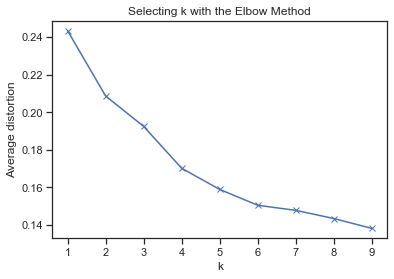

In [350]:
#The Elbow method

from scipy.spatial.distance import cdist 

K = range(1, 10) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=1) 
    kmeans.fit(X_norm) 
    meandistortions.append(sum(np.min(cdist(X_norm, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X_norm.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 

### K Means Clustering

In [351]:
k_means = KMeans(init='k-means++', n_clusters=5, random_state=0)

In [352]:
k_means.fit(X_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [353]:
k_means.labels_

array([3, 3, 3, ..., 4, 4, 4])

In [354]:
k_means.cluster_centers_

array([[ 0.11902136,  0.00843906, -0.02131374,  0.01072739,  0.02477091,
         0.00556161,  0.02446029,  0.05245684,  0.01534569],
       [ 0.1074046 ,  0.05328689,  0.6090523 ,  0.05197596,  0.10472191,
         0.01486603,  0.07056982,  0.11546361,  0.03506251],
       [-0.09013946, -0.03701449, -0.02713989, -0.02221116, -0.0404437 ,
        -0.00524688, -0.0314411 , -0.18854422, -0.01987381],
       [ 0.31959721,  0.06901783, -0.01850106,  0.17665211,  0.1968735 ,
         0.0169818 ,  0.16190851,  0.14095369,  0.11585605],
       [-0.07800644,  0.00173326, -0.0253895 , -0.02504923, -0.03076099,
        -0.00426439, -0.02746836,  0.04998442, -0.01844621]])

In [355]:
m3Regression1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
m3Regression1.head()



,cluster
0,3
1,3
2,3
3,1
4,3


In [356]:
m3Regression = m3Regression.reset_index(drop=True)
m3Regression1 = m3Regression1.reset_index(drop=True)

m3Regression3 = m3Regression.join(m3Regression1)
m3Regression3.head()

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,imdb_score,movie_facebook_likes,cluster
0,723.0,178.0,0.0,760505847.0,886204,4834,3054.0,7.9,33000,3
1,302.0,169.0,563.0,309404152.0,471220,48350,1238.0,7.1,0,3
2,602.0,148.0,0.0,200074175.0,275868,11700,994.0,6.8,85000,3
3,813.0,164.0,22000.0,448130642.0,1144337,106759,2701.0,8.5,164000,1
4,462.0,132.0,475.0,73058679.0,212204,1873,738.0,6.6,24000,3


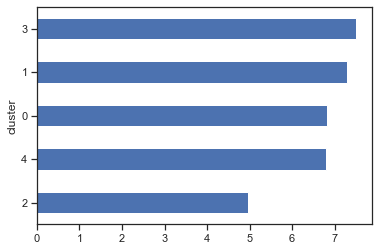

In [357]:
m3Regression3.groupby('cluster')['imdb_score'].mean().sort_values(ascending=True).plot(kind='barh')


   - Top Performing K Means Cluster (Cluster 3) IMDB Score:  7.50
    
        - Duration:                  129.93
        - Director Facebook Likes:   296
        - Gross:                     183.55 Million
        - Number Voted Users:        423003
        - Cast Total Facebook Likes: 21469
        - Number User for Reviews:   1111
        - Movie Facebook Likes:      48520
        


In [358]:
cluster2 = m3Regression3[(m3Regression3['cluster']==2)]

 

In [359]:
cluster2.mean()

num_critic_for_reviews       7.691031e+01
duration                     9.705830e+01
director_facebook_likes      9.746457e+01
gross                        3.231123e+07
num_voted_users              2.199383e+04
cast_total_facebook_likes    6.870847e+03
num_user_for_reviews         1.332601e+02
imdb_score                   4.958565e+00
movie_facebook_likes         1.149995e+03
cluster                      2.000000e+00
dtype: float64

In [360]:
cluster2.head()



,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,imdb_score,movie_facebook_likes,cluster
70,85.0,106.0,188.0,113745408.0,129601,15870,648.0,4.8,0,2
73,186.0,96.0,293.0,100289690.0,115099,108016,257.0,5.4,2000,2
83,10.0,109.0,596.0,48468407.0,2138,1982,15.0,4.5,677,2
130,145.0,88.0,12.0,119420252.0,33042,2217,90.0,5.1,0,2
137,280.0,103.0,0.0,131564731.0,118951,2857,1382.0,4.2,18000,2


In [361]:
m3Regression3[(m3Regression3['cluster']==0)].mean()

num_critic_for_reviews       2.467489e+02
duration                     1.111489e+02
director_facebook_likes      2.314661e+02
gross                        5.736119e+07
num_voted_users              1.321907e+05
cast_total_facebook_likes    1.396910e+04
num_user_for_reviews         4.160652e+02
imdb_score                   6.814273e+00
movie_facebook_likes         1.344160e+04
cluster                      0.000000e+00
dtype: float64

In [362]:
m3Regression3[(m3Regression3['cluster']==1)].mean()

num_critic_for_reviews       2.373161e+02
duration                     1.250517e+02
director_facebook_likes      1.472989e+04
gross                        8.873096e+07
num_voted_users              2.672886e+05
cast_total_facebook_likes    2.007959e+04
num_user_for_reviews         6.493333e+02
imdb_score                   7.299425e+00
movie_facebook_likes         2.032277e+04
cluster                      1.000000e+00
dtype: float64

In [363]:
m3Regression3[(m3Regression3['cluster']==3)].mean()

num_critic_for_reviews       4.096165e+02
duration                     1.299283e+02
director_facebook_likes      2.961577e+02
gross                        1.835479e+08
num_voted_users              4.230025e+05
cast_total_facebook_likes    2.146908e+04
num_user_for_reviews         1.111416e+03
imdb_score                   7.495699e+00
movie_facebook_likes         4.851971e+04
cluster                      3.000000e+00
dtype: float64

In [364]:
m3Regression3[(m3Regression3['cluster']==4)].mean()

num_critic_for_reviews       8.676232e+01
duration                     1.090701e+02
director_facebook_likes      1.377234e+02
gross                        3.015287e+07
num_voted_users              3.835527e+04
cast_total_facebook_likes    7.516075e+03
num_user_for_reviews         1.533582e+02
imdb_score                   6.795235e+00
movie_facebook_likes         1.648225e+03
cluster                      4.000000e+00
dtype: float64

### Agglomerative Clustering

In [365]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward



In [366]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=5, linkage='ward').fit(X_norm)
agg.labels_


array([2, 2, 2, ..., 0, 0, 0], dtype=int64)

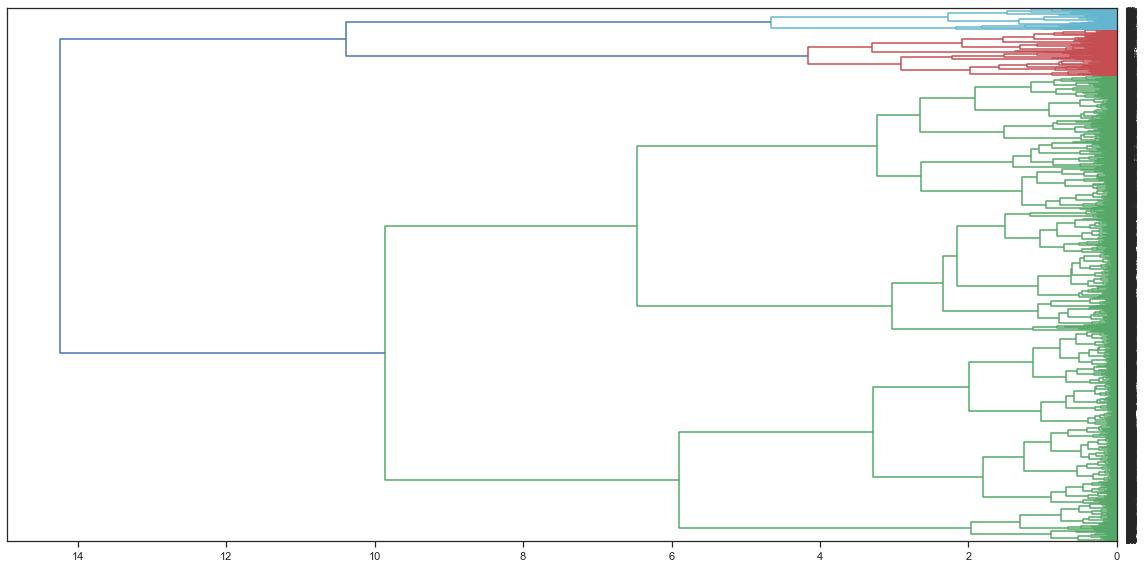

In [367]:
plt.figure(figsize=(16,8))

linkage_matrix = ward(X_norm)
dendrogram(linkage_matrix, orientation="left")
plt.tight_layout() 

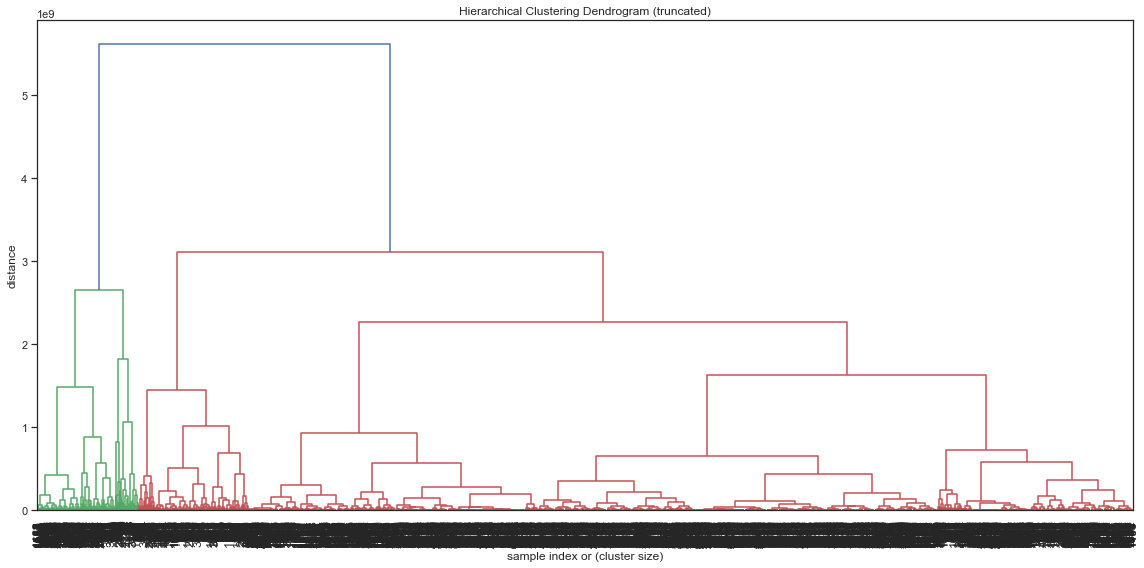

In [368]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           #truncate_mode='lastp',  # show only the last p merged clusters
           #p=12,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout()


In [369]:
m3Regression5 = pd.DataFrame(agg.labels_, columns = ['cluster'])
m3Regression5.head()

,cluster
0,2
1,2
2,2
3,1
4,2


In [370]:
m3Regression = m3Regression.reset_index(drop=True)
m3Regression5 = m3Regression5.reset_index(drop=True)

m3Regression6 = m3Regression.join(m3Regression5)
m3Regression6.head()

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,imdb_score,movie_facebook_likes,cluster
0,723.0,178.0,0.0,760505847.0,886204,4834,3054.0,7.9,33000,2
1,302.0,169.0,563.0,309404152.0,471220,48350,1238.0,7.1,0,2
2,602.0,148.0,0.0,200074175.0,275868,11700,994.0,6.8,85000,2
3,813.0,164.0,22000.0,448130642.0,1144337,106759,2701.0,8.5,164000,1
4,462.0,132.0,475.0,73058679.0,212204,1873,738.0,6.6,24000,2


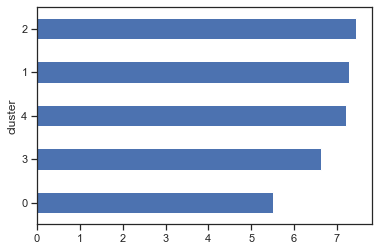

In [371]:
m3Regression6.groupby('cluster')['imdb_score'].mean().sort_values(ascending=True).plot(kind='barh')


   - Top Performing Aglomerrative (Cluster 2) IMDB Score:  7.44
  
        - Duration:                  124.45
        - Director Facebook Likes:   287
        - Gross:                     149.43 Million
        - Number Voted Users:        371000
        - Cast Total Facebook Likes: 19701
        - Number User for Reviews:   985
        - Movie Facebook Likes:      42939

In [372]:
m3Regression6[(m3Regression6['cluster']==0)].mean()

num_critic_for_reviews       7.486303e+01
duration                     9.767094e+01
director_facebook_likes      1.016036e+02
gross                        2.825442e+07
num_voted_users              2.307047e+04
cast_total_facebook_likes    6.638828e+03
num_user_for_reviews         1.252116e+02
imdb_score                   5.513697e+00
movie_facebook_likes         8.499527e+02
cluster                      0.000000e+00
dtype: float64

In [373]:
m3Regression6[(m3Regression6['cluster']==1)].mean()

num_critic_for_reviews       2.365886e+02
duration                     1.250629e+02
director_facebook_likes      1.470857e+04
gross                        8.822565e+07
num_voted_users              2.659407e+05
cast_total_facebook_likes    1.996940e+04
num_user_for_reviews         6.466514e+02
imdb_score                   7.282286e+00
movie_facebook_likes         2.020664e+04
cluster                      1.000000e+00
dtype: float64

In [374]:
m3Regression6[(m3Regression6['cluster']==2)].mean()

num_critic_for_reviews       3.835929e+02
duration                     1.244478e+02
director_facebook_likes      2.876107e+02
gross                        1.494255e+08
num_voted_users              3.709996e+05
cast_total_facebook_likes    1.970085e+04
num_user_for_reviews         9.851094e+02
imdb_score                   7.437913e+00
movie_facebook_likes         4.293893e+04
cluster                      2.000000e+00
dtype: float64

In [375]:
m3Regression6[(m3Regression6['cluster']==3)].mean()

num_critic_for_reviews       2.274419e+02
duration                     1.083046e+02
director_facebook_likes      2.046400e+02
gross                        5.797146e+07
num_voted_users              1.089867e+05
cast_total_facebook_likes    1.415705e+04
num_user_for_reviews         3.514437e+02
imdb_score                   6.619894e+00
movie_facebook_likes         1.050504e+04
cluster                      3.000000e+00
dtype: float64

In [376]:
m3Regression6[(m3Regression6['cluster']==4)].mean()

num_critic_for_reviews       9.216327e+01
duration                     1.188533e+02
director_facebook_likes      1.618231e+02
gross                        3.117196e+07
num_voted_users              5.008393e+04
cast_total_facebook_likes    7.270346e+03
num_user_for_reviews         1.938659e+02
imdb_score                   7.203304e+00
movie_facebook_likes         2.672380e+03
cluster                      4.000000e+00
dtype: float64

# References.

Includes all references from mid-term project

github.io, pandas qcut. http://pandas-docs.github.io/pandas-docs-travis/reference/api/pandas.qcut.html?highlight=qcut#pandas.qcut

ibm.com, Markdown for Jupyter Notebook Cheatsheet. https://www.ibm.com/support/knowledgecenter/en/SSGNPV_1.1.3/dsx/markd-jupyter.html

imdb.com, What is IMDB. https://help.imdb.com/article/imdb/general-information/what-is-imdb/G836CY29Z4SGNMK5?ref_=helpsect_cons_1_1#

stackoverflow.com, Convert pandas column to dateline. https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime

stackoverflow.com, Is there a not equal operator in python. https://stackoverflow.com/questions/11060506/is-there-a-not-equal-operator-in-python

stackoverflow.com, Pandas convert column with year integer to datetime. https://stackoverflow.com/questions/46658232/pandas-convert-column-with-year-integer-to-datetime

stackoverflow.com, ValueError: Unknown label type: 'continuous'. https://stackoverflow.com/questions/43211239/valueerror-unknown-label-type-continuous

stackoverflow.com, What is the difference between pandas qcut and pandas cut. https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut

sebastianrascka.com, ipython internal links. https://sebastianraschka.com/Articles/2014_ipython_internal_links.html


# Instructor References

Includes references included in MIS665 provided code fpr Elbow Method

packthub.com, Big data and business intelligence.  https://www.packtpub.com/big-data-and-business-intelligence/mastering-machine-learning-scikit-learn

scipy.org, Spatial distance.  http://docs.scipy.org/doc/scipy/reference/spatial.distance.htm